In [1]:
def zero_cross(signal):
    """
    Finds the indices in a 1D array where the signal crosses zero.
    A zero-crossing occurs when consecutive elements have opposite signs.

    Parameters:
    ----------
    signal : numpy.ndarray
        A 1D numpy array containing sampled values of a signal or function.

    Returns:
    -------
    numpy.ndarray
        An array of indices where a sign change (zero-crossing) occurs.
        Each index i returned corresponds to a sign change between signal[i] and signal[i+1].

    Example:
    -------
    >>> signal = np.array([1, -1, -2, 3, -4])
    >>> zero_cross(signal)
    array([0, 2, 3])  # zero-crossings between (1, -1), (-2, 3), and (3, -4)
    """

    # Step 1: Get the sign of each element in the signal.
    # Positive values → 1, Negative → -1, Zero → 0
    sign_array = np.sign(signal)

    # Step 2: Compute the difference between consecutive signs.
    # If two adjacent signs differ, there is a sign change (i.e., zero crossing).
    sign_diff = np.diff(sign_array)

    # Step 3: The indices where sign_diff is non-zero correspond to sign changes.
    # np.nonzero returns a tuple, we extract the first element to get the indices.
    zero_crossing_indices = np.nonzero(sign_diff)[0]

    return zero_crossing_indices


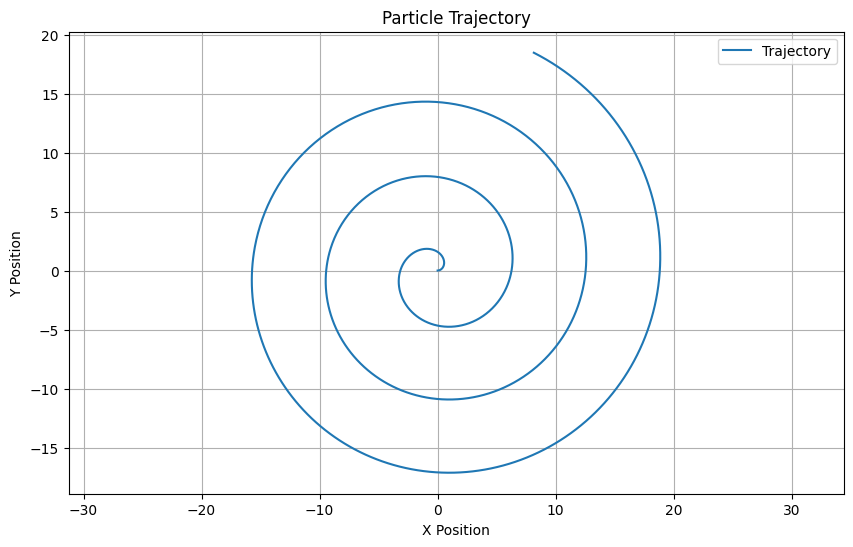

In [2]:
# a(t) =  -2Sin(t)-tCos(t)_x^ + 2Cos(t)-tSin(t)_y^ 

# סעיף ב

import numpy as np
import matplotlib.pyplot as plt

v_x_initial = 1
v_y_initial = 0
dt = 0.01  # Time step for integration
t = np.arange(0, 20, dt) # Time array

# acceleration components
a_x = -2 * np.sin(t) - t * np.cos(t)
a_y = 2 * np.cos(t) - t * np.sin(t)

# Integrate on acceleration to get velocity
v_x = v_x_initial + np.cumsum(a_x) * dt
v_y = v_y_initial + np.cumsum(a_y) * dt

# Integrate on velocity to get position
x = np.cumsum(v_x) * dt
y = np.cumsum(v_y) * dt

# Plotting the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Particle Trajectory')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

The third time the velocity crosses zero is at t = 6.43 seconds.


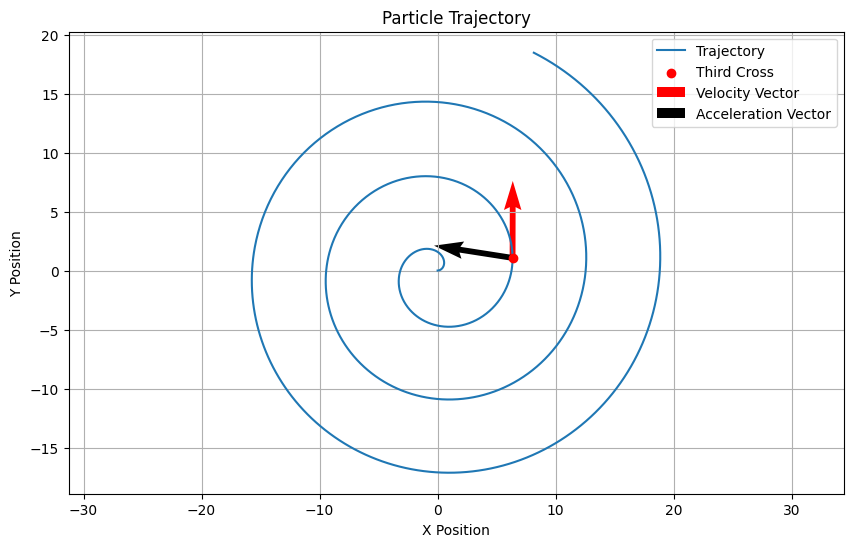

In [3]:
# סעיף ד
# When v(t) = 0 for the third time

third_cross = zero_cross(v_x)[2]
print(f"The third time the velocity crosses zero is at t = {third_cross * dt:.2f} seconds.")

# Get the location of the particle on the third time velocity on the x-axis is zero
third_cross_x, third_cross_y = x[third_cross], y[third_cross]
third_cross_v_x, third_cross_v_y = v_x[third_cross], v_y[third_cross]
third_cross_a_x, third_cross_a_y = a_x[third_cross], a_y[third_cross]


plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Trajectory')
plt.scatter(third_cross_x, third_cross_y, color='red', label='Third Cross', zorder=5)
plt.quiver(third_cross_x, third_cross_y, third_cross_v_x, third_cross_v_y, 
           color='red', angles='xy', scale_units='xy', scale=1, label='Velocity Vector')
plt.quiver(third_cross_x, third_cross_y, third_cross_a_x, third_cross_a_y, 
           color='black', angles='xy', scale_units='xy', scale=1, label='Acceleration Vector')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Particle Trajectory')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

In [4]:
# סעיף ה
# Finding the distance from the origin to the point where the velocity crosses zero for the third time

distance_from_origin = np.sqrt(third_cross_x**2 + third_cross_y**2)
print(f"The distance from the origin to the point where the velocity crosses zero for the third time is: {distance_from_origin:.2f} units.")

The distance from the origin to the point where the velocity crosses zero for the third time is: 6.45 units.
